In [2]:
print("Hello")

Hello


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_DIRECTORY = r"G:\SUMIT\Model-1\data"


In [5]:

# Create ImageDataGenerator instance
datagen = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0,1]
    validation_split=0.2  # split data into training and validation sets
)

In [6]:
# Load and preprocess images from directory
train_generator = datagen.flow_from_directory(
    DATA_DIRECTORY,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # for multi-class classification
    subset='training'  # specify the subset as training data
)

Found 76395 images belonging to 60 classes.


In [7]:
validation_generator = datagen.flow_from_directory(
    DATA_DIRECTORY,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # specify the subset as validation data
)

Found 19073 images belonging to 60 classes.


In [8]:
validation_generator

In [9]:
# Load and preprocess images from directory
train_generator = datagen.flow_from_directory(
    DATA_DIRECTORY,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # for multi-class classification
    subset='training'  # specify the subset as training data
)

Found 76395 images belonging to 60 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    DATA_DIRECTORY,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # specify the subset as validation data
)

Found 19073 images belonging to 60 classes.


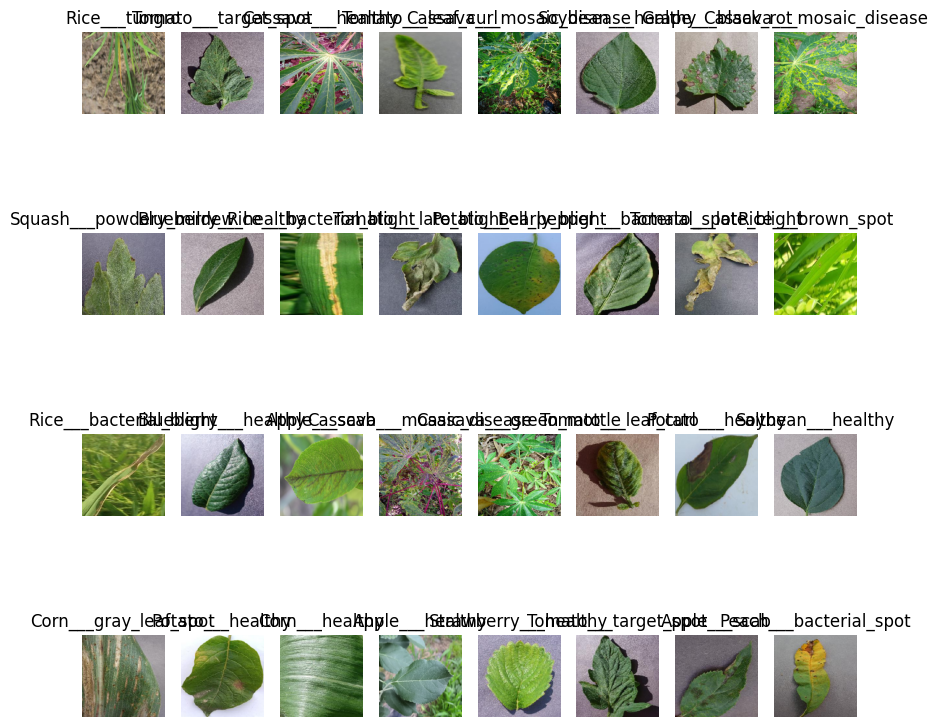

In [11]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training generator
batch_images, batch_labels = next(train_generator)

# Dictionary mapping class indices to class labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Plot images with labels
plt.figure(figsize=(10, 10))
for i in range(len(batch_images)):
    plt.subplot(4, 8, i+1)
    plt.imshow(batch_images[i])
    plt.title(class_labels[batch_labels[i].argmax()])  # Get the label corresponding to the one-hot encoded label
    plt.axis('off')
plt.show()


In [12]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(60, activation='softmax')  # Change number of units to 60
])

c:\Users\EVLab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,148,028 (42.53 MB)

 Trainable params: 11,148,028 (42.53 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE)


Epoch 1/10


c:\Users\EVLab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1548/2387 ━━━━━━━━━━━━━━━━━━━━ 5:12 372ms/step - accuracy: 0.3984 - loss: 2.3154

In [ ]:
import h5py
model.save("model2.h5")